# SEMOS Education_Data Science Institute_Programming in Python





# PROJECT - Predict Length of Stay in Hospitals

## Version 1.2. - outliers removed / imputed, noscaled data


# Import neccessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sklearn.linear_model as LinearRegression
import statsmodels.api as sm

# 1. Load dataset

In [2]:
raw_data = pd.read_csv('Healthcare.Blueprint-Predicting Length of Stay in Hospitals.csv')
raw_data.head()

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,...,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay,number_of_issues
0,0,F,0,0,0,0,0,0,0,0,...,0.823340,1.684186,-0.161915,1.454965,0.312741,1.936991,0.010963,4,3,0
1,5+,F,0,0,0,0,0,0,0,0,...,-0.386613,-1.596543,-0.470738,-0.779911,-0.671360,-1.068721,0.010963,1,7,0
2,1,F,0,0,0,0,0,0,0,0,...,-1.611147,-0.381186,-0.161915,-0.167779,-0.480071,-0.811089,0.010963,2,3,0
3,0,F,0,0,0,0,0,0,0,0,...,0.367584,0.713958,-0.161915,-0.961187,-0.921644,0.219441,0.010963,1,1,0
4,0,F,0,0,0,1,0,1,0,0,...,0.247842,-1.569599,-0.200518,0.716587,0.226159,-0.553456,-1.572234,2,4,2


# 2. Exploratory Data Analysis

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   rcount                      100000 non-null  object 
 1   gender                      100000 non-null  object 
 2   dialysisrenalendstage       100000 non-null  int64  
 3   asthma                      100000 non-null  int64  
 4   irondef                     100000 non-null  int64  
 5   pneum                       100000 non-null  int64  
 6   substancedependence         100000 non-null  int64  
 7   psychologicaldisordermajor  100000 non-null  int64  
 8   depress                     100000 non-null  int64  
 9   psychother                  100000 non-null  int64  
 10  fibrosisandother            100000 non-null  int64  
 11  malnutrition                100000 non-null  int64  
 12  hemo                        100000 non-null  int64  
 13  hematocrit     

In [4]:
raw_data.describe(include='all')

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,...,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay,number_of_issues
count,100000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.00000,100000.000000
unique,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,55031,57643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.036420,0.035270,0.094940,0.039450,0.063060,0.239040,0.051660,0.049390,...,-3.471501e-13,-1.302496e-15,4.393996e-16,2.533973e-14,-2.690606e-13,-3.087308e-16,3.973057e-14,2.123310,4.00103,0.743500
std,NaN,NaN,0.187334,0.184462,0.293134,0.194664,0.243072,0.426499,0.221341,0.216682,...,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,2.050641,2.36031,1.097406
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-4.326754e+00,-4.766780e+00,-1.011179e+00,-4.392176e+00,-3.899210e+00,-4.503820e+00,-1.107141e+01,0.000000,1.00000,0.000000
25%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-6.735227e-01,-6.761946e-01,-2.391207e-01,-6.722725e-01,-6.744943e-01,-6.393338e-01,1.096290e-02,1.000000,2.00000,0.000000
50%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.415443e-03,4.173018e-03,-1.619149e-01,-2.925473e-03,8.765736e-04,-3.819143e-02,1.096290e-02,1.000000,4.00000,0.000000
75%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.739070e-01,6.740811e-01,-7.503219e-03,6.767057e-01,6.742954e-01,6.488284e-01,1.096290e-02,3.000000,6.00000,1.000000


In [5]:
raw_data.describe(include = "float").round(6)

,hematocrit,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000
std,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005
min,-3.728717,-1.882544,-4.326754,-4.766780,-1.011179,-4.392176,-3.899210,-4.503820,-11.071414
25%,-0.529554,-0.462807,-0.673523,-0.676195,-0.239121,-0.672273,-0.674494,-0.639334,0.010963
50%,-0.037375,-0.145235,-0.001415,0.004173,-0.161915,-0.002925,0.000877,-0.038191,0.010963
75%,0.454803,0.247061,0.673907,0.674081,-0.007503,0.676706,0.674295,0.648828,0.010963
max,5.967206,44.034739,4.499148,4.317059,51.604595,4.673169,4.556204,4.856825,6.167839


In [6]:
raw_data.describe(include = "int")

,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,malnutrition,hemo,secondarydiagnosisnonicd9,lengthofstay,number_of_issues
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,0.036420,0.035270,0.094940,0.039450,0.063060,0.239040,0.051660,0.049390,0.004790,0.049480,0.080000,2.123310,4.00103,0.743500
std,0.187334,0.184462,0.293134,0.194664,0.243072,0.426499,0.221341,0.216682,0.069044,0.216869,0.271295,2.050641,2.36031,1.097406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.00000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,6.00000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,17.00000,9.000000


In [7]:
duplicates = raw_data[raw_data.duplicated()]
print(f"Duplicate rows: \n {duplicates}")

Duplicate rows: 
 Empty DataFrame
Columns: [rcount, gender, dialysisrenalendstage, asthma, irondef, pneum, substancedependence, psychologicaldisordermajor, depress, psychother, fibrosisandother, malnutrition, hemo, hematocrit, neutrophils, sodium, glucose, bloodureanitro, creatinine, bmi, pulse, respiration, secondarydiagnosisnonicd9, lengthofstay, number_of_issues]
Index: []

[0 rows x 25 columns]



# 3. Exploring the Probability Distribution Functions


##  Detecting outliers, data distribution, patterns and insights



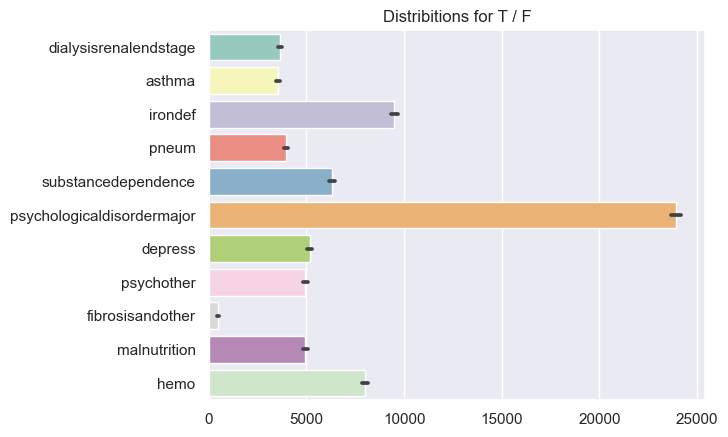

In [8]:
def bern_distributions(data):
    bern_col = raw_data[['dialysisrenalendstage','asthma','irondef','pneum','substancedependence','psychologicaldisordermajor','depress','psychother','fibrosisandother','malnutrition','hemo']]
    sns.barplot(data = bern_col, estimator = "sum", orient = "h", palette = "Set3")
    plt.title(f'Distribitions for T / F') 
    plt.show()

bern_distributions(raw_data)

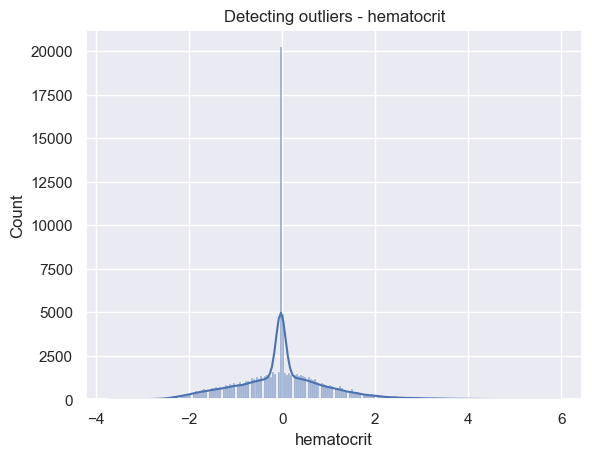

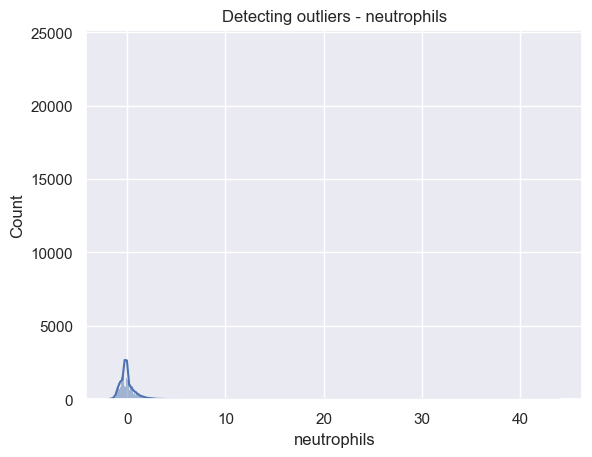

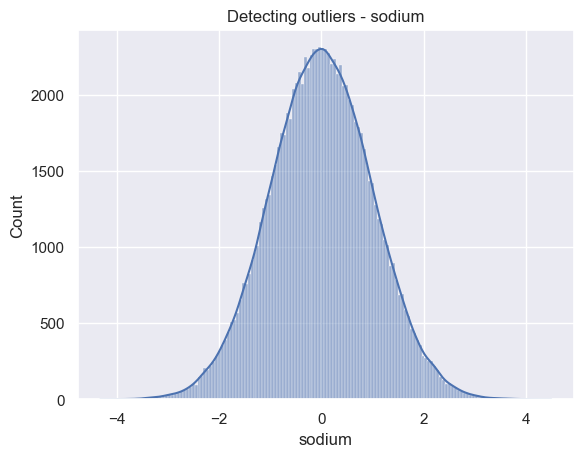

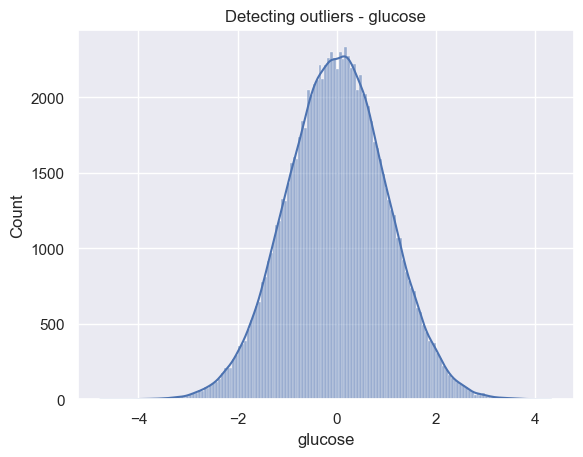

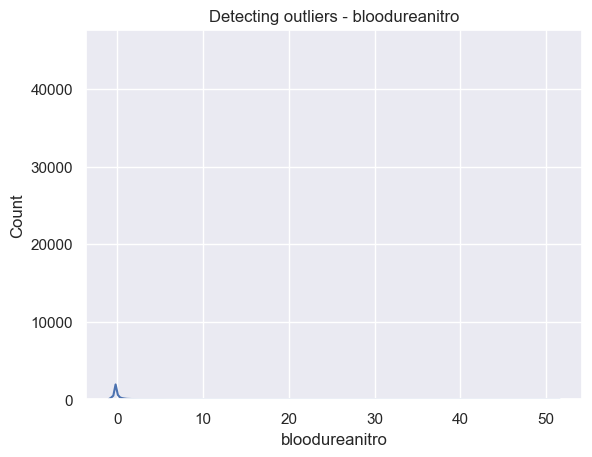

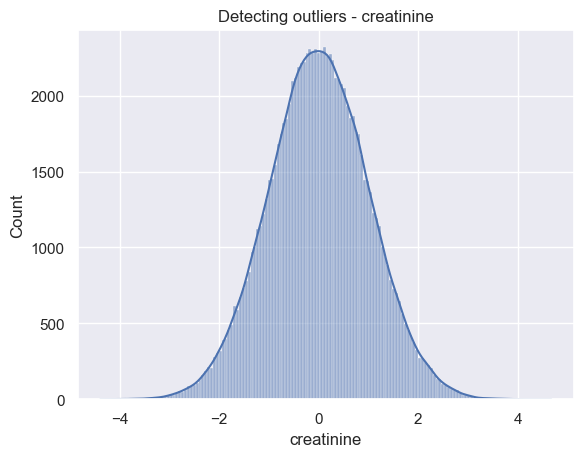

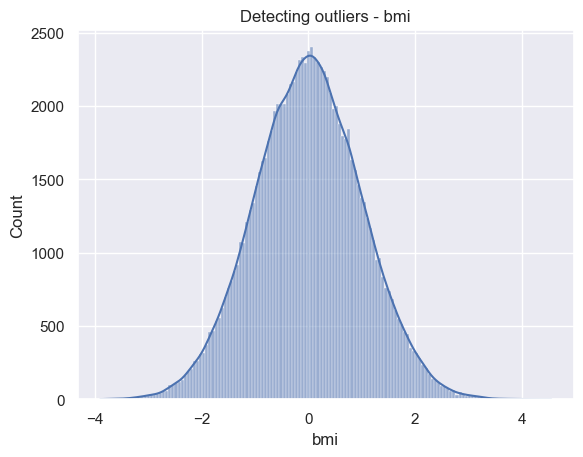

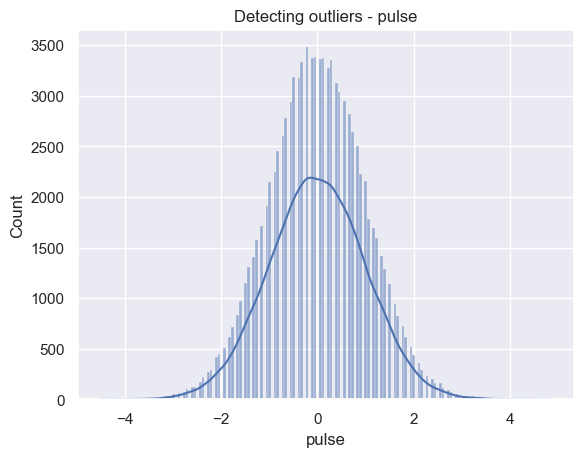

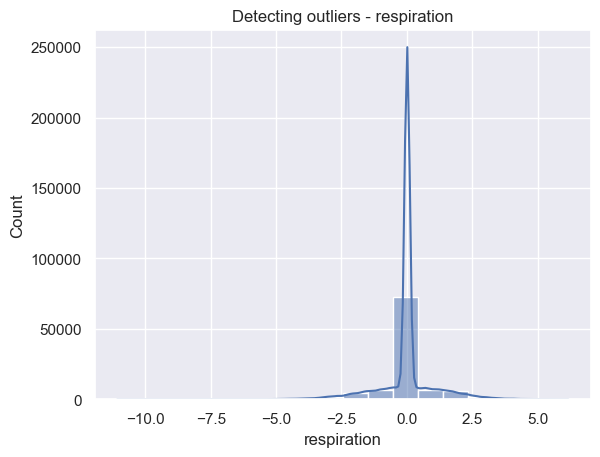

In [9]:
def hist_distribution(data):
    var_columns = data.select_dtypes(include = ['float64']).columns
    for column in var_columns:
        sns.histplot(x = data[column], kde = True)
        plt.title(f'Detecting outliers - {column}') 
        plt.show()
hist_distribution(raw_data)

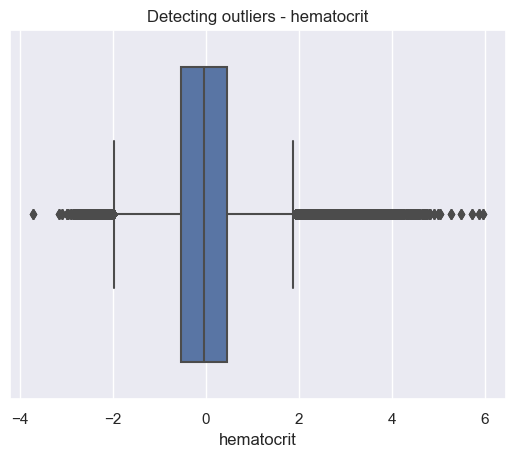

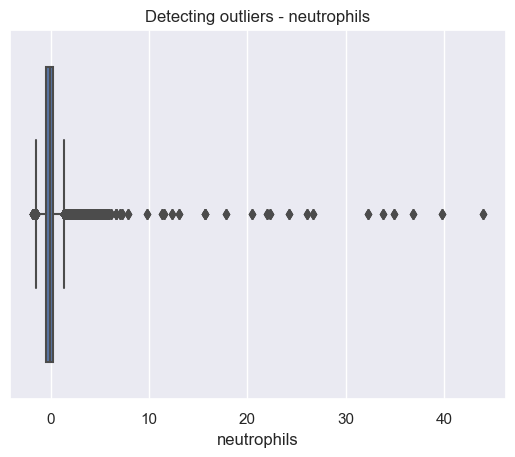

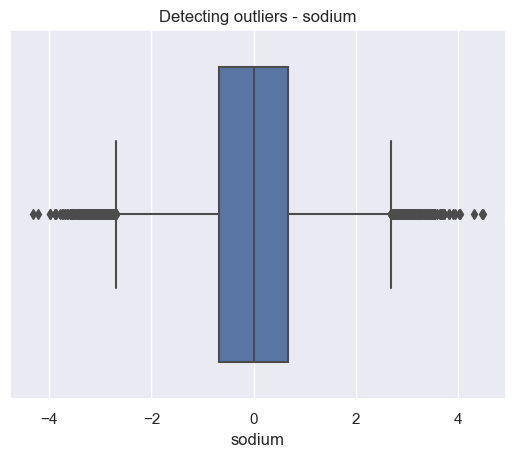

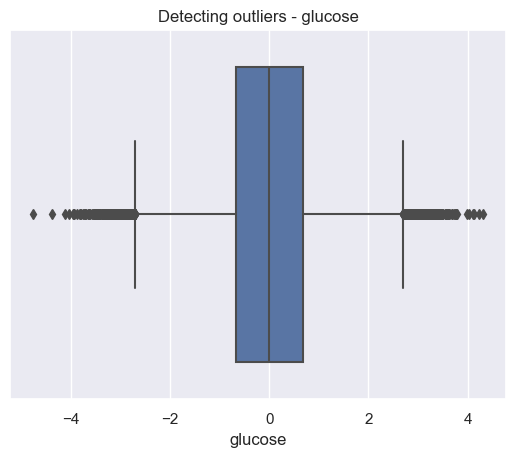

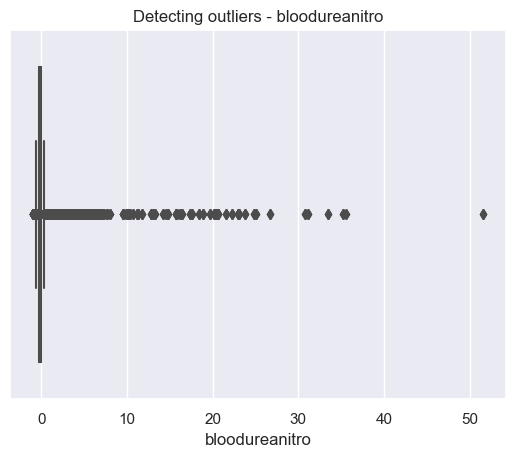

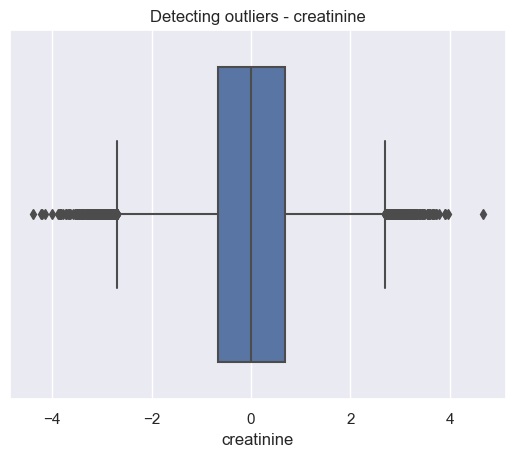

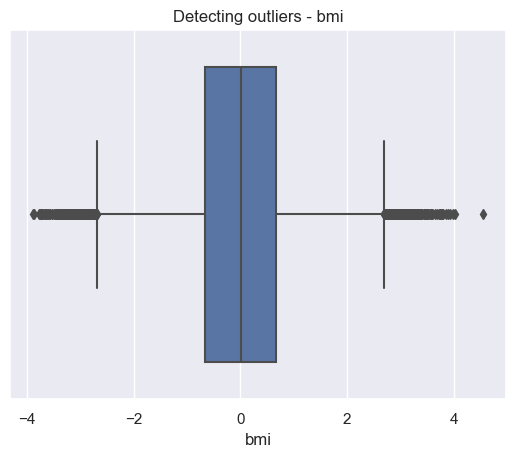

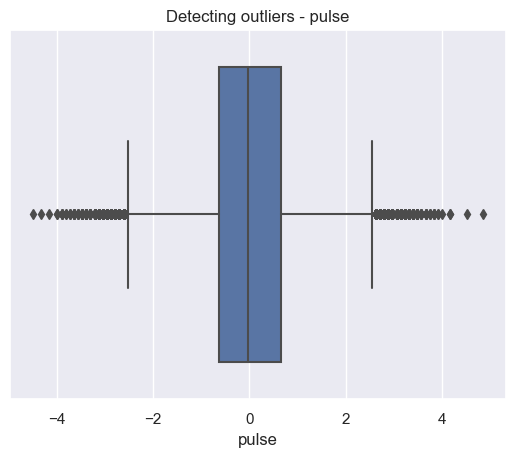

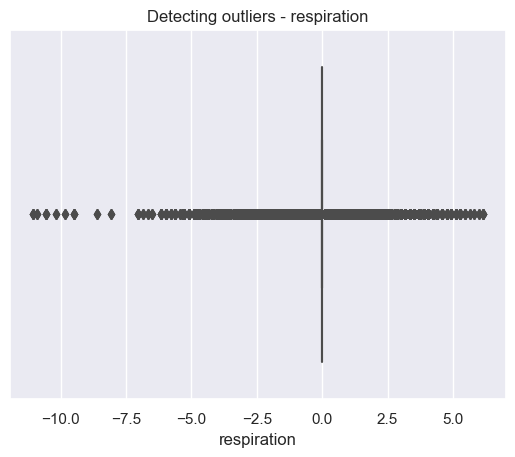

In [10]:
def box_distribution(data):
    var_columns = data.select_dtypes(include = ['float64']).columns
    for column in var_columns:
        sns.boxplot(x = data[column])
        plt.title(f'Detecting outliers - {column}') 
        plt.show()
box_distribution(raw_data)

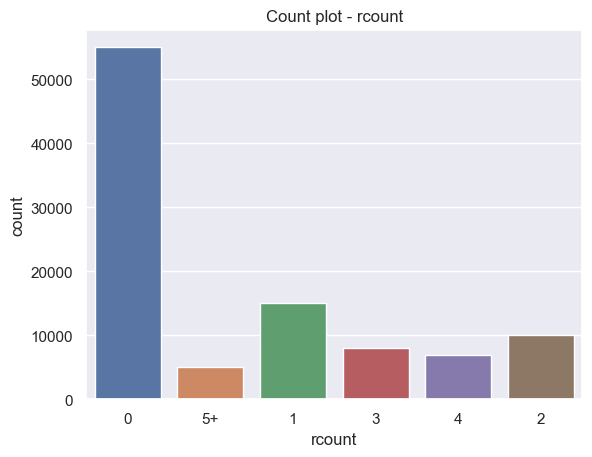

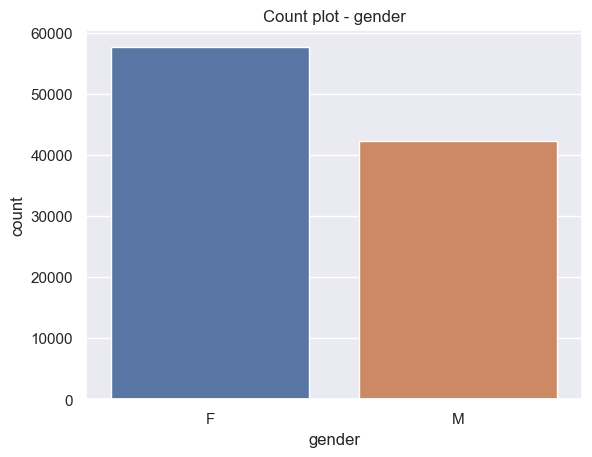

In [11]:
def count_cat(data):
    obj_columns = data.select_dtypes(include = 'object').columns
    for column in obj_columns:
        sns.countplot(x = column, data = data)
        plt.title(f'Count plot - {column}')
        plt.show()
count_cat(raw_data)

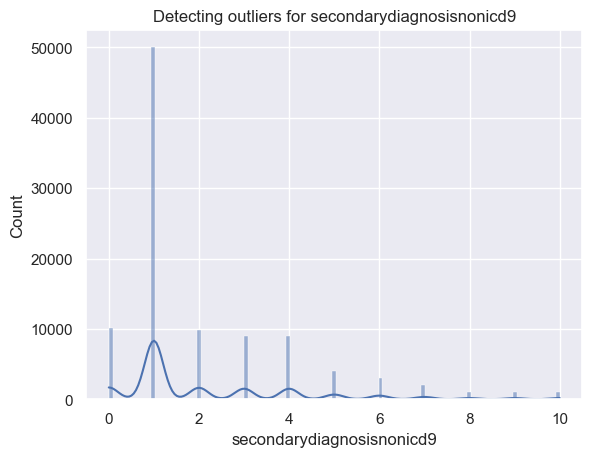

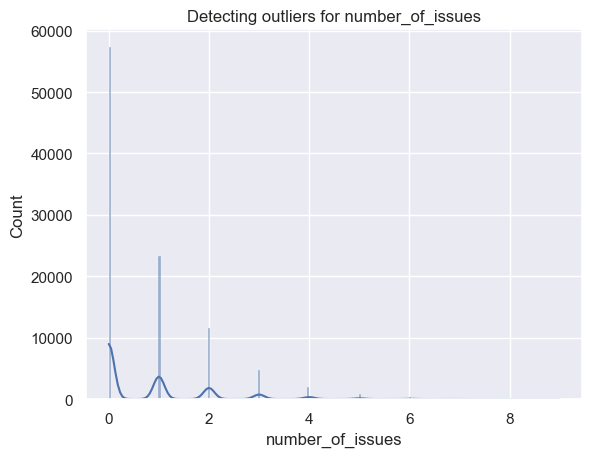

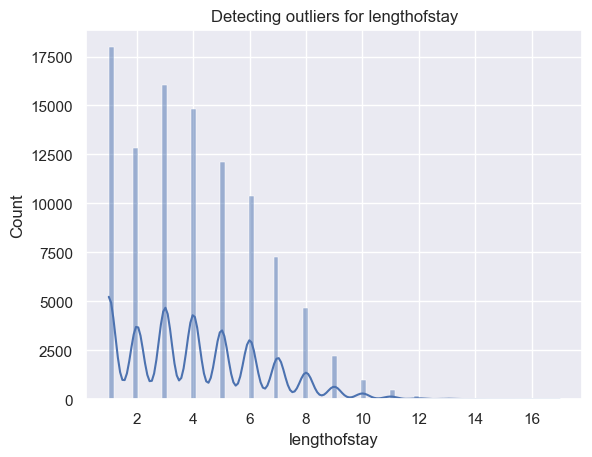

In [12]:
def hist_distribution(data):
    num_columns = raw_data[['secondarydiagnosisnonicd9','number_of_issues','lengthofstay']]
    for column in num_columns:
        sns.histplot(x = data[column], kde = True)
        plt.title(f'Detecting outliers for {column}')
        plt.show()
hist_distribution(raw_data)

# 4. Dealing with outliers

## 4.1. Dealing with "var" outliers
#### delete < 1%, impute > 1%


In [13]:
raw_data.describe(include = "float").round(6)
# for normal(Gaussian) distribution - z-score method

,hematocrit,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000
std,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005,1.000005
min,-3.728717,-1.882544,-4.326754,-4.766780,-1.011179,-4.392176,-3.899210,-4.503820,-11.071414
25%,-0.529554,-0.462807,-0.673523,-0.676195,-0.239121,-0.672273,-0.674494,-0.639334,0.010963
50%,-0.037375,-0.145235,-0.001415,0.004173,-0.161915,-0.002925,0.000877,-0.038191,0.010963
75%,0.454803,0.247061,0.673907,0.674081,-0.007503,0.676706,0.674295,0.648828,0.010963
max,5.967206,44.034739,4.499148,4.317059,51.604595,4.673169,4.556204,4.856825,6.167839


In [14]:
outliers = []
def outliers_zscore(data):
    data=sorted(data)
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score) > thres: 
            outliers.append(i)
    return outliers

In [15]:
neutrophils_outliers = outliers_zscore(raw_data['neutrophils'])
print(len(neutrophils_outliers))    

791


In [16]:
out_percentage = len(neutrophils_outliers)/100000*100
print(f"Percentage of outliers: {out_percentage}%")

Percentage of outliers: 0.791%


In [17]:
# outliers with quantile check 
qn_data = raw_data.copy()
qn = qn_data['neutrophils'].quantile(0.99)
qn_datan = qn_data[qn_data['neutrophils'] > qn]
len(qn_datan)

997

In [18]:
out_percentage_q = len(qn_datan)/100000*100
print(f"Percentage of outliers with quantile: {out_percentage_q}%")

Percentage of outliers with quantile: 0.997%


In [19]:
data1 = raw_data.copy()
for i in neutrophils_outliers:
    data1['neutrophils'] = np.where(data1['neutrophils'] == i, np.nan, data1['neutrophils'])

In [20]:
def delete_nan(data):
    data_cleaned = data1.dropna(axis = 0)
    return data_cleaned
data2 = delete_nan(data1)
data2.describe(include = 'all')

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,...,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay,number_of_issues
count,99209,99209,99209.000000,99209.000000,99209.000000,99209.00000,99209.000000,99209.000000,99209.000000,99209.000000,...,99209.000000,99209.000000,99209.000000,99209.000000,99209.000000,99209.000000,99209.000000,99209.000000,99209.000000,99209.000000
unique,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,54595,57159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.036438,0.035380,0.095072,0.03917,0.063240,0.240351,0.051951,0.049754,...,0.000062,-0.000211,0.000472,0.000057,0.000445,-0.000445,0.001830,2.123285,3.994406,0.745205
std,NaN,NaN,0.187379,0.184739,0.293316,0.19400,0.243396,0.427299,0.221929,0.217436,...,0.999915,1.000103,1.002691,1.000282,0.999718,0.999745,0.998513,2.050992,2.357472,1.096952
min,NaN,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,-4.326754,-4.766780,-1.011179,-4.392176,-3.899210,-4.503820,-11.071414,0.000000,1.000000,0.000000
25%,NaN,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,-0.673518,-0.676612,-0.239121,-0.672360,-0.673756,-0.639334,0.010963,1.000000,2.000000,0.000000
50%,NaN,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,-0.001409,0.003917,-0.161915,-0.002838,0.001375,-0.038191,0.010963,1.000000,4.000000,0.000000
75%,NaN,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.673843,0.674079,-0.007503,0.676881,0.674285,0.648828,0.010963,3.000000,6.000000,1.000000


In [21]:
data3 = data2.reset_index(drop = True)
data3

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,...,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay,number_of_issues
0,0,F,0,0,0,0,0,0,0,0,...,0.823340,1.684186,-0.161915,1.454965,0.312741,1.936991,0.010963,4,3,0
1,5+,F,0,0,0,0,0,0,0,0,...,-0.386613,-1.596543,-0.470738,-0.779911,-0.671360,-1.068721,0.010963,1,7,0
2,1,F,0,0,0,0,0,0,0,0,...,-1.611147,-0.381186,-0.161915,-0.167779,-0.480071,-0.811089,0.010963,2,3,0
3,0,F,0,0,0,0,0,0,0,0,...,0.367584,0.713958,-0.161915,-0.961187,-0.921644,0.219441,0.010963,1,1,0
4,0,F,0,0,0,1,0,1,0,0,...,0.247842,-1.569599,-0.200518,0.716587,0.226159,-0.553456,-1.572234,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99204,3,M,0,0,0,0,0,0,0,0,...,-1.759010,0.982207,-0.161915,-2.242209,0.128413,0.562951,0.010963,1,6,0
99205,0,M,0,0,0,0,0,0,0,0,...,0.145324,-0.654187,-0.161915,2.107623,-0.417321,-1.068721,0.010963,1,1,0
99206,1,M,0,0,1,0,0,0,0,0,...,-0.398543,-1.122777,-0.161915,-0.367884,-1.722183,-1.068721,0.714606,1,4,1
99207,0,M,0,0,0,0,0,0,1,0,...,-0.637034,-1.007329,0.146908,-0.319335,-0.305574,-1.240476,-1.572234,1,4,1


In [22]:
bloodureanitro_outliers = outliers_zscore(data3['bloodureanitro'])
print(len(bloodureanitro_outliers))

1753


In [23]:
data4 = data3.copy() 
blood_mean = data4['bloodureanitro'].mean()

for i in bloodureanitro_outliers:
    data4['bloodureanitro'] = np.where(data4['bloodureanitro'] == i, blood_mean , data4['bloodureanitro'])

In [24]:
respiration_outliers = outliers_zscore(data4['respiration'])
print(len(respiration_outliers))

3990


In [25]:
data5 = data4.copy() 
respir_mean = data5['respiration'].mean()

for i in respiration_outliers:
    data5['respiration'] = np.where(data5['respiration'] == i, respir_mean, data5['respiration'])

In [26]:
data5.describe(include = 'float')

,hematocrit,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration
count,99209.000000,99209.000000,99209.000000,99209.000000,99209.000000,99209.000000,99209.000000,99209.000000,99209.000000
mean,-0.010975,-0.042476,0.000062,-0.000211,-0.061960,0.000057,0.000445,-0.000445,0.008885
std,0.984166,0.703810,0.999915,1.000103,0.485644,1.000282,0.999718,0.999745,0.809476
min,-3.728717,-1.882544,-4.326754,-4.766780,-1.011179,-4.392176,-3.899210,-4.503820,-2.979520
25%,-0.529554,-0.462807,-0.673518,-0.676612,-0.239121,-0.672360,-0.673756,-0.639334,0.010963
50%,-0.037375,-0.145235,-0.001409,0.003917,-0.161915,-0.002838,0.001375,-0.038191,0.010963
75%,0.454803,0.228380,0.673843,0.674079,-0.007503,0.676881,0.674285,0.648828,0.010963
max,5.967206,2.993131,4.499148,4.317059,3.003524,4.673169,4.556204,4.856825,2.913490


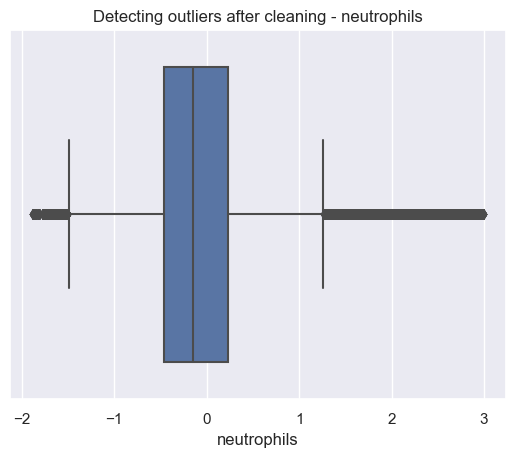

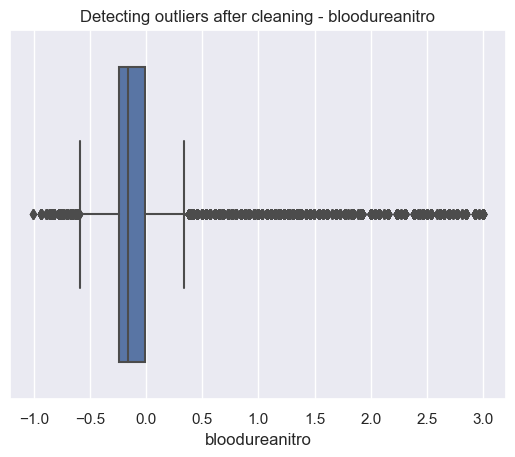

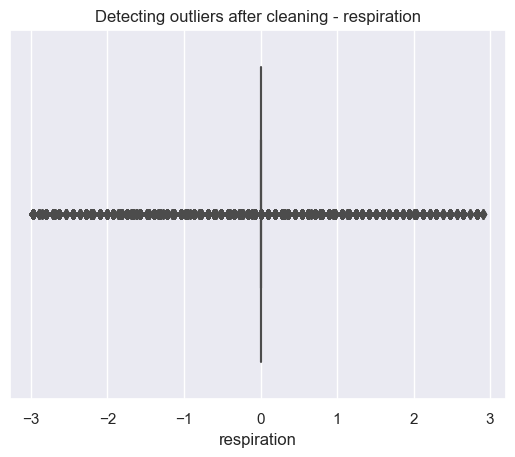

In [27]:
def box_distribution(data):
    blood_columns = data5[['neutrophils', 'bloodureanitro', 'respiration']]
    for column in blood_columns:
        sns.boxplot(x = data5[column])
        plt.title(f'Detecting outliers after cleaning - {column}')
        plt.show()
box_distribution(data5)

## 4.2. Dealing with outliers in descrete numeric columns

In [28]:
num_columns = data5[['secondarydiagnosisnonicd9','number_of_issues','lengthofstay']]
num_columns.describe()    

,secondarydiagnosisnonicd9,number_of_issues,lengthofstay
count,99209.000000,99209.000000,99209.000000
mean,2.123285,0.745205,3.994406
std,2.050992,1.096952,2.357472
min,0.000000,0.000000,1.000000
25%,1.000000,0.000000,2.000000
50%,1.000000,0.000000,4.000000
75%,3.000000,1.000000,6.000000
max,10.000000,9.000000,17.000000


In [29]:
q1 = data5['secondarydiagnosisnonicd9'].quantile(0.99)
data6 = data5[data5['secondarydiagnosisnonicd9'] < q1]

In [30]:
q2 = data6['number_of_issues'].quantile(0.99)
data7 = data6[data6['number_of_issues'] < q2]

In [31]:
q3 = data7['lengthofstay'].quantile(0.99)
data8 = data7[data7['lengthofstay'] < q3]

In [32]:
data_reindexed = data8.reset_index(drop = True)
data_reindexed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95582 entries, 0 to 95581
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rcount                      95582 non-null  object 
 1   gender                      95582 non-null  object 
 2   dialysisrenalendstage       95582 non-null  int64  
 3   asthma                      95582 non-null  int64  
 4   irondef                     95582 non-null  int64  
 5   pneum                       95582 non-null  int64  
 6   substancedependence         95582 non-null  int64  
 7   psychologicaldisordermajor  95582 non-null  int64  
 8   depress                     95582 non-null  int64  
 9   psychother                  95582 non-null  int64  
 10  fibrosisandother            95582 non-null  int64  
 11  malnutrition                95582 non-null  int64  
 12  hemo                        95582 non-null  int64  
 13  hematocrit                  955

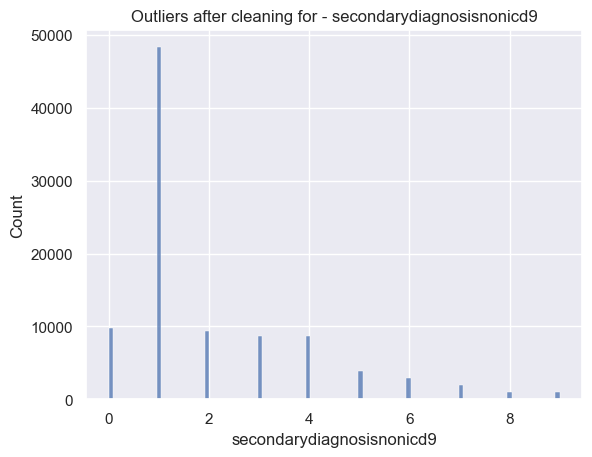

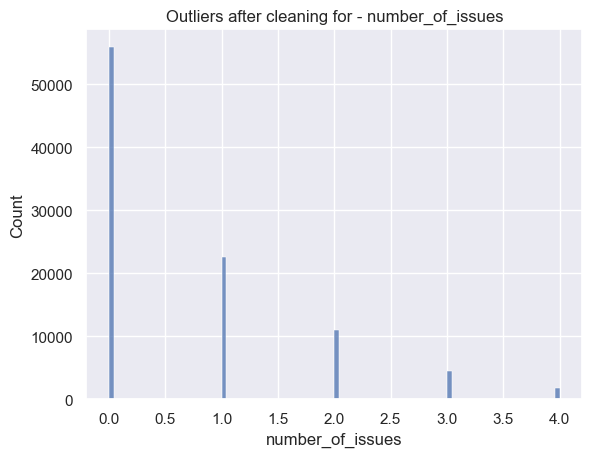

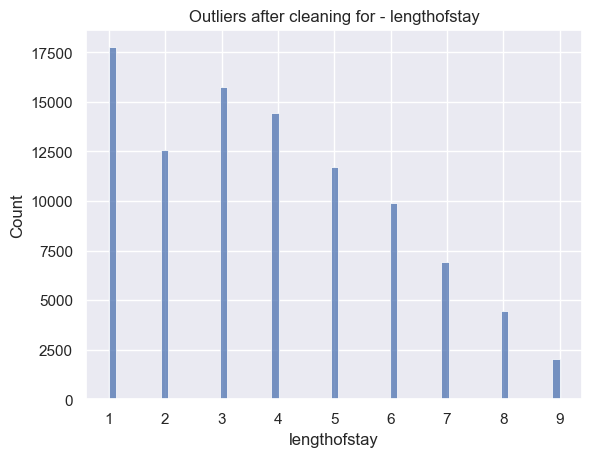

In [33]:
def hist_distribution(data_reindexed):
    num_columns = data_reindexed[['secondarydiagnosisnonicd9','number_of_issues','lengthofstay']]
    for column in num_columns:
        sns.histplot(x = data_reindexed[column])
        plt.title(f'Outliers after cleaning for - {column}')
        plt.show()
hist_distribution(data_reindexed)

In [34]:
data_reindexed

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,...,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay,number_of_issues
0,0,F,0,0,0,0,0,0,0,0,...,0.823340,1.684186,-0.161915,1.454965,0.312741,1.936991,0.010963,4,3,0
1,5+,F,0,0,0,0,0,0,0,0,...,-0.386613,-1.596543,-0.470738,-0.779911,-0.671360,-1.068721,0.010963,1,7,0
2,1,F,0,0,0,0,0,0,0,0,...,-1.611147,-0.381186,-0.161915,-0.167779,-0.480071,-0.811089,0.010963,2,3,0
3,0,F,0,0,0,0,0,0,0,0,...,0.367584,0.713958,-0.161915,-0.961187,-0.921644,0.219441,0.010963,1,1,0
4,0,F,0,0,0,1,0,1,0,0,...,0.247842,-1.569599,-0.200518,0.716587,0.226159,-0.553456,-1.572234,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95577,3,M,0,0,0,0,0,0,0,0,...,-1.759010,0.982207,-0.161915,-2.242209,0.128413,0.562951,0.010963,1,6,0
95578,0,M,0,0,0,0,0,0,0,0,...,0.145324,-0.654187,-0.161915,2.107623,-0.417321,-1.068721,0.010963,1,1,0
95579,1,M,0,0,1,0,0,0,0,0,...,-0.398543,-1.122777,-0.161915,-0.367884,-1.722183,-1.068721,0.714606,1,4,1
95580,0,M,0,0,0,0,0,0,1,0,...,-0.637034,-1.007329,0.146908,-0.319335,-0.305574,-1.240476,-1.572234,1,4,1


# 6. Preprocessing data 
## 6.1. Checking the OLS assumptions

## Linearity

Text(0.5, 1.0, 'lengthofstay and number_of_issues')

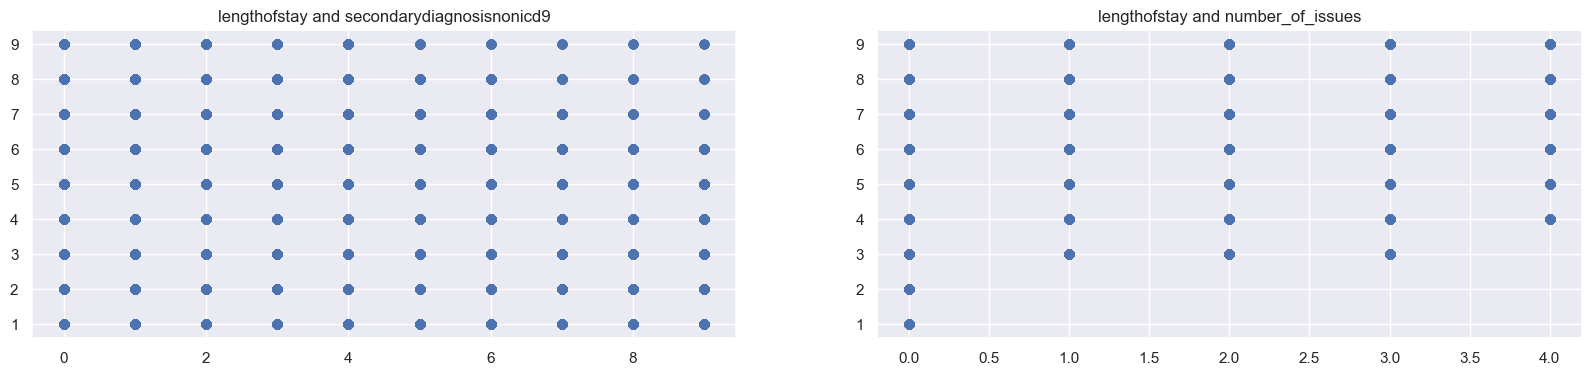

In [35]:
f, (ax1, ax2) = plt.subplots(1,2, figsize =(20, 4)) 
ax1.scatter(x = data_reindexed['secondarydiagnosisnonicd9'],y = data_reindexed['lengthofstay'])
ax1.set_title('lengthofstay and secondarydiagnosisnonicd9')
ax2.scatter(data_reindexed['number_of_issues'],data_reindexed['lengthofstay'])
ax2.set_title('lengthofstay and number_of_issues')

### No linearity?

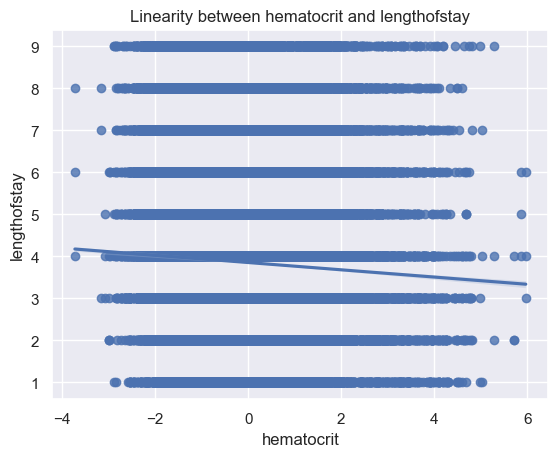

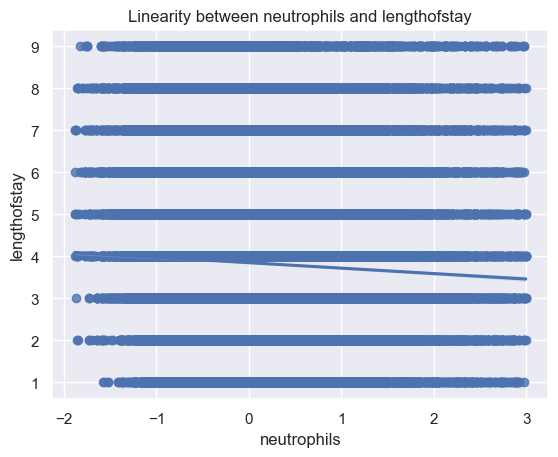

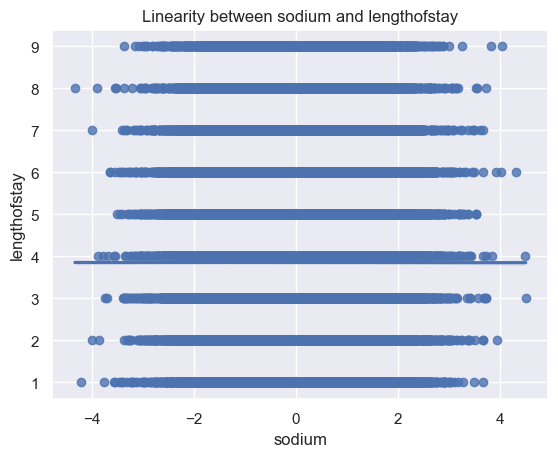

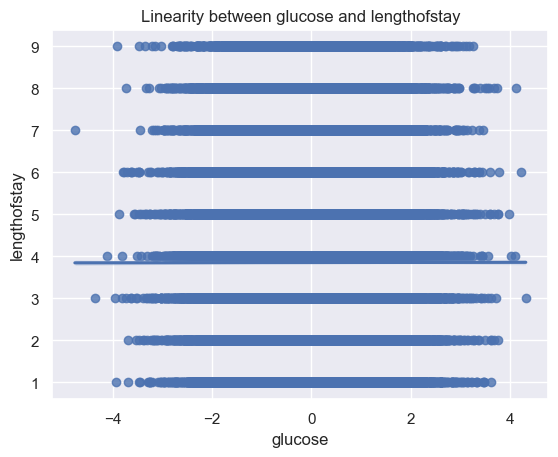

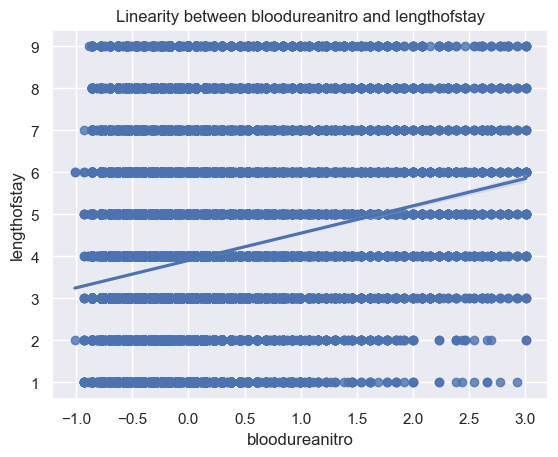

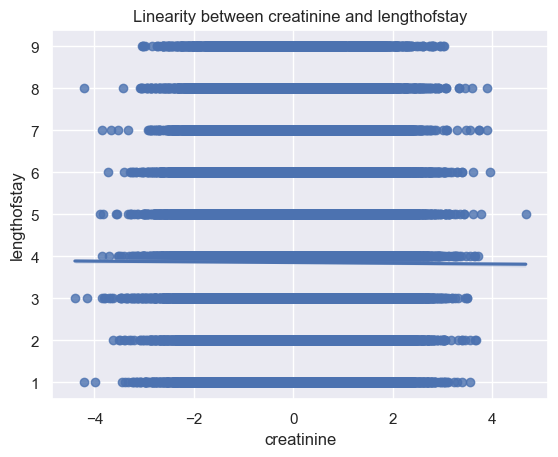

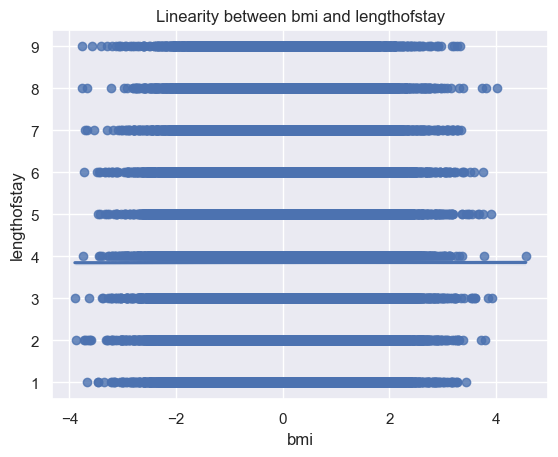

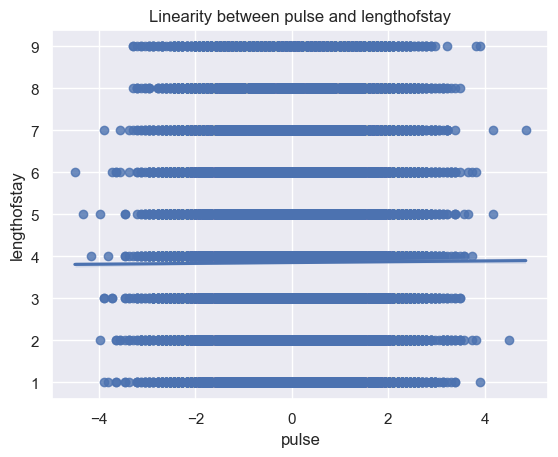

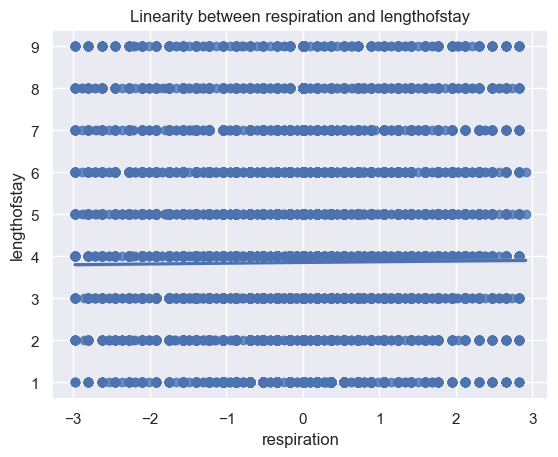

In [36]:
var_columns = data_reindexed.select_dtypes(include = ['float64'])
for column in var_columns:
    sns.regplot(x = var_columns[column],y = data_reindexed['lengthofstay'])
    plt.title(f"Linearity between {column} and lengthofstay")
    plt.show()

## No multicollinearity           

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
def check_multicoll(data, ind_var):
    vif_data = pd.DataFrame()
    vif_data['Variables'] = ind_var
    vif_data['VIF'] = [variance_inflation_factor(data[ind_var].values, i) for i in range(len(ind_var))] 
    return vif_data

In [39]:
ind_var = data_reindexed.select_dtypes(include = "float64").columns
vif_result = check_multicoll(data_reindexed, ind_var)
vif_result

,Variables,VIF
0,hematocrit,1.057430
1,neutrophils,1.026737
2,sodium,1.000078
3,glucose,1.000096
4,bloodureanitro,1.012040
5,creatinine,1.000080
6,bmi,1.000081
7,pulse,1.000115
8,respiration,1.044885


In [40]:
ind_var1 = data_reindexed[['secondarydiagnosisnonicd9', 'number_of_issues']].columns
vif_result = check_multicoll(data_reindexed, ind_var1)
vif_result

,Variables,VIF
0,secondarydiagnosisnonicd9,1.217421
1,number_of_issues,1.217421


## 6.3. Mapping categorical variables

In [41]:
data_mapped = data_reindexed.copy()
data_mapped['gender'] = data_reindexed['gender'].map({'F':1,'M':2})

In [42]:
mapped_data = data_mapped.copy()
mapped_data['rcount'] = data_mapped['rcount'].map({'0':0, '1':1, '2':2,'3':3,'4':4, '5+': 5})

In [43]:
mapped_data.describe(include ='all')

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,...,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay,number_of_issues
count,95582.000000,95582.000000,95582.000000,95582.000000,95582.000000,95582.000000,95582.000000,95582.000000,95582.000000,95582.000000,...,95582.000000,95582.000000,95582.000000,95582.000000,95582.000000,95582.000000,95582.000000,95582.000000,95582.000000,95582.000000
mean,1.075014,1.418981,0.028269,0.034871,0.085926,0.033542,0.058484,0.230619,0.049654,0.040311,...,0.000559,0.001261,-0.077199,0.000445,0.001268,-0.001768,0.013843,2.039108,3.854251,0.676791
std,1.503605,0.493395,0.165741,0.183453,0.280257,0.180048,0.234657,0.421231,0.217230,0.196689,...,0.995113,0.994067,0.459585,0.995403,0.994949,0.995466,0.787836,1.892741,2.192007,0.971379
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-4.326754,-4.766780,-1.011179,-4.392176,-3.899210,-4.503820,-2.979520,0.000000,1.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.668290,-0.671001,-0.239121,-0.667548,-0.668715,-0.639334,0.010963,1.000000,2.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.000937,0.006088,-0.161915,-0.002107,0.003008,-0.038191,0.010963,1.000000,4.000000,0.000000
75%,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.670590,0.670677,-0.084709,0.673150,0.671339,0.648828,0.010963,3.000000,5.000000,1.000000
max,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.499148,4.317059,3.003524,4.673169,4.556204,4.856825,2.913490,9.000000,9.000000,4.000000


<Axes: >

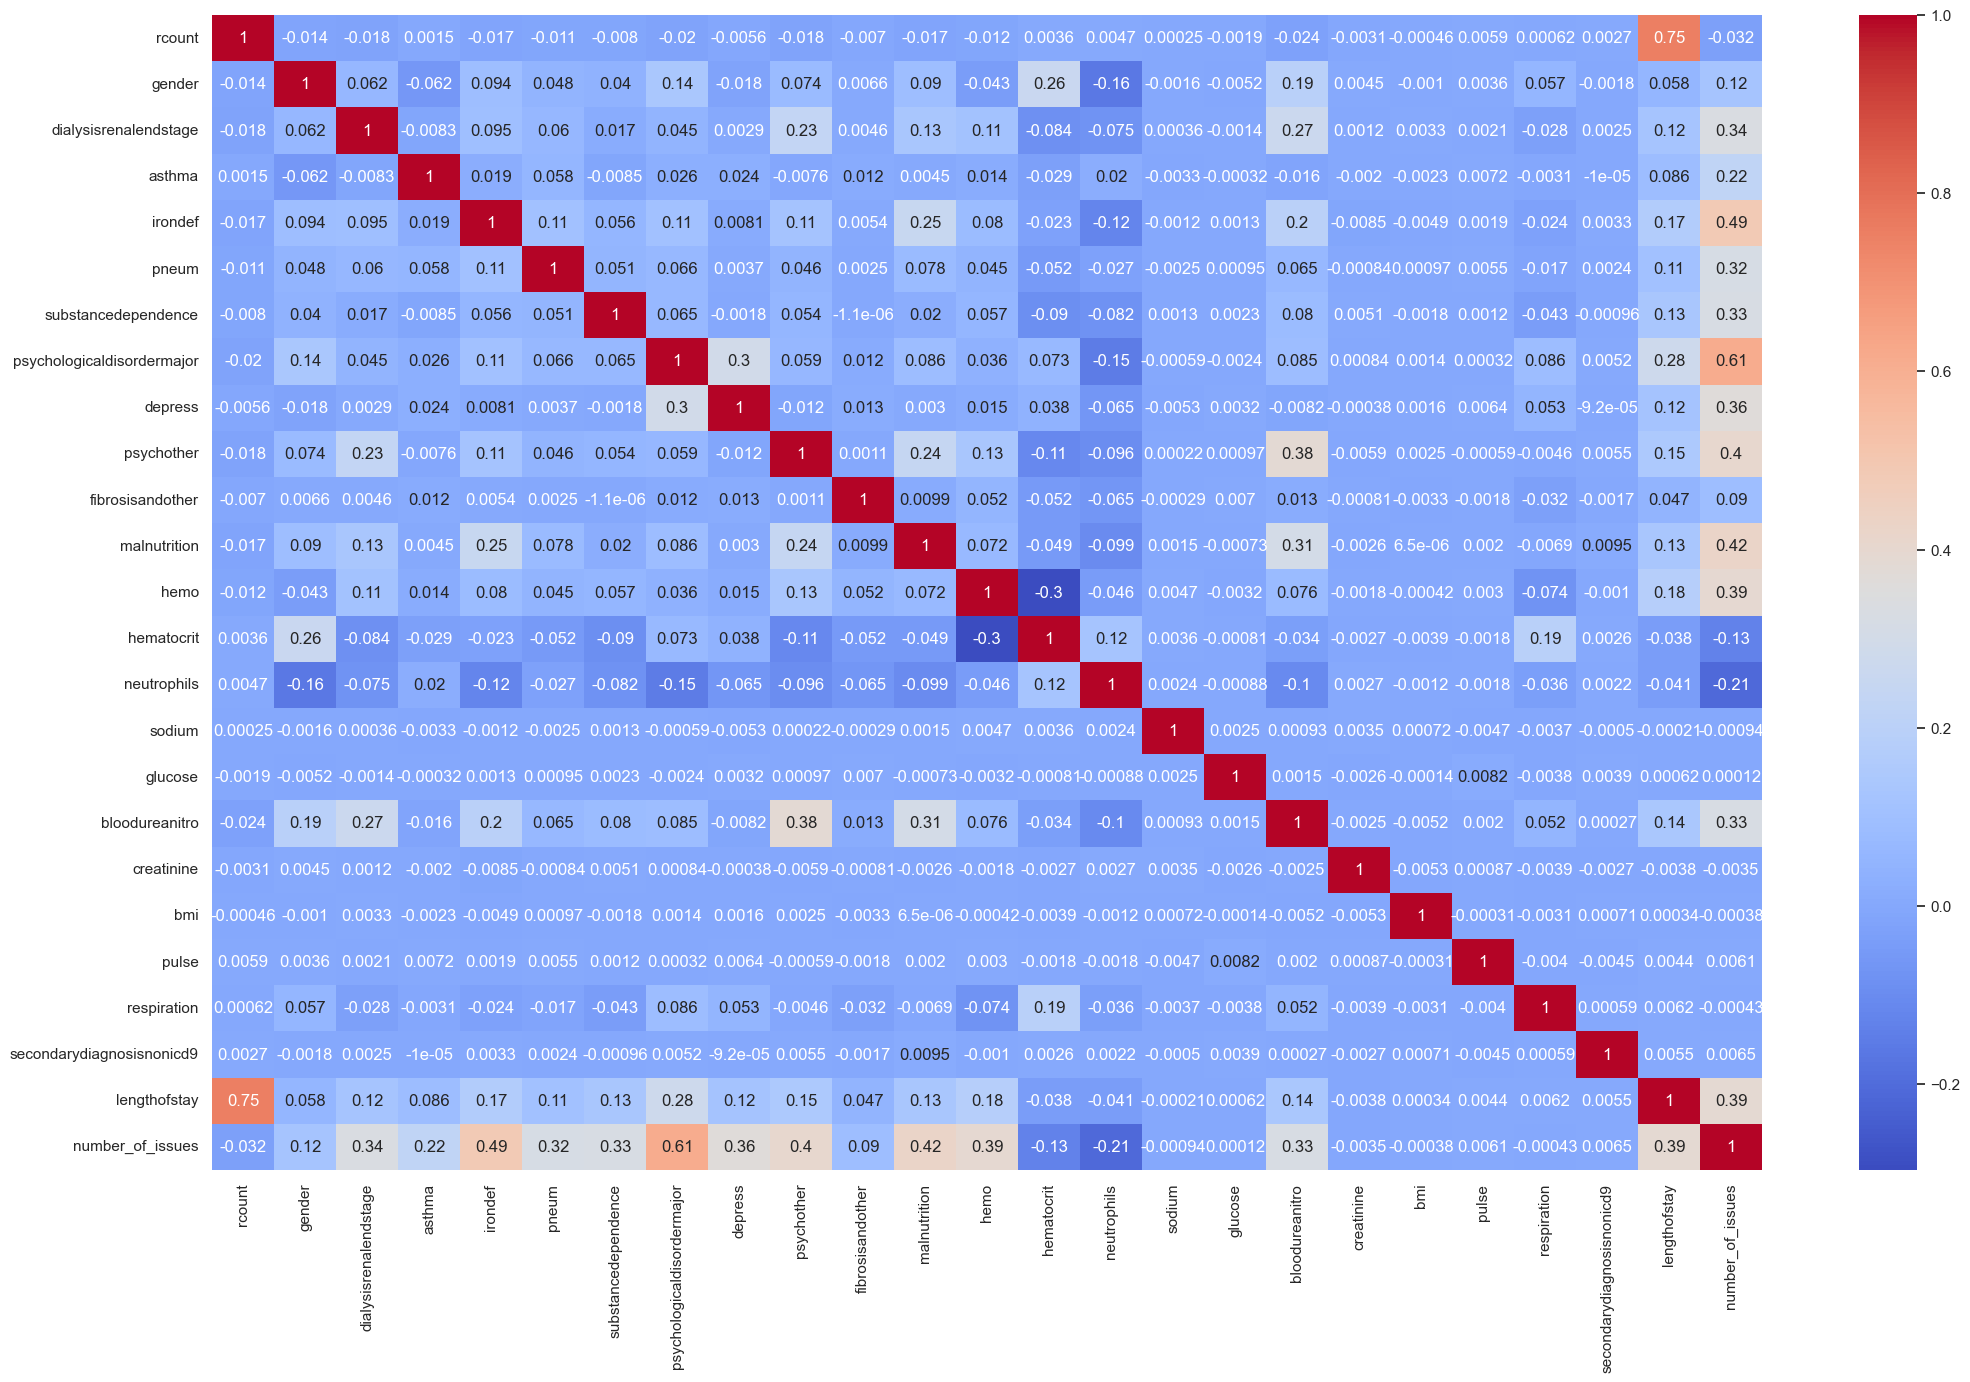

In [44]:
corr_matrix = mapped_data.corr()
plt.figure(figsize = (25,15))
sns.heatmap(corr_matrix,annot = True, cmap = 'coolwarm')

## 6.4. Define predictors and target

## 6.5. Scale features

In [45]:
prescaled_data = mapped_data.copy()
prescaled_data

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,...,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay,number_of_issues
0,0,1,0,0,0,0,0,0,0,0,...,0.823340,1.684186,-0.161915,1.454965,0.312741,1.936991,0.010963,4,3,0
1,5,1,0,0,0,0,0,0,0,0,...,-0.386613,-1.596543,-0.470738,-0.779911,-0.671360,-1.068721,0.010963,1,7,0
2,1,1,0,0,0,0,0,0,0,0,...,-1.611147,-0.381186,-0.161915,-0.167779,-0.480071,-0.811089,0.010963,2,3,0
3,0,1,0,0,0,0,0,0,0,0,...,0.367584,0.713958,-0.161915,-0.961187,-0.921644,0.219441,0.010963,1,1,0
4,0,1,0,0,0,1,0,1,0,0,...,0.247842,-1.569599,-0.200518,0.716587,0.226159,-0.553456,-1.572234,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95577,3,2,0,0,0,0,0,0,0,0,...,-1.759010,0.982207,-0.161915,-2.242209,0.128413,0.562951,0.010963,1,6,0
95578,0,2,0,0,0,0,0,0,0,0,...,0.145324,-0.654187,-0.161915,2.107623,-0.417321,-1.068721,0.010963,1,1,0
95579,1,2,0,0,1,0,0,0,0,0,...,-0.398543,-1.122777,-0.161915,-0.367884,-1.722183,-1.068721,0.714606,1,4,1
95580,0,2,0,0,0,0,0,0,1,0,...,-0.637034,-1.007329,0.146908,-0.319335,-0.305574,-1.240476,-1.572234,1,4,1


In [47]:
predictors = prescaled_data.drop(['lengthofstay'], axis = 1)
target = prescaled_data['lengthofstay']

## 6.6. Split the data

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state = 500)

# 7.1. Linear Regression

In [50]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)


LinearRegression()

In [51]:
np.random.seed(100)

In [52]:
y_pred = lm.predict(x_train)

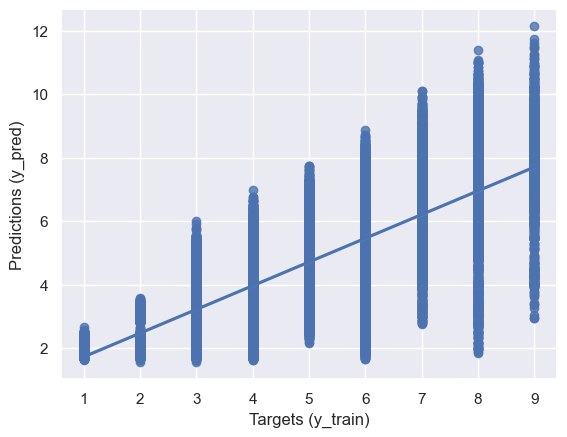

In [53]:
sns.regplot(x = y_train, y = y_pred)
plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_pred)')
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

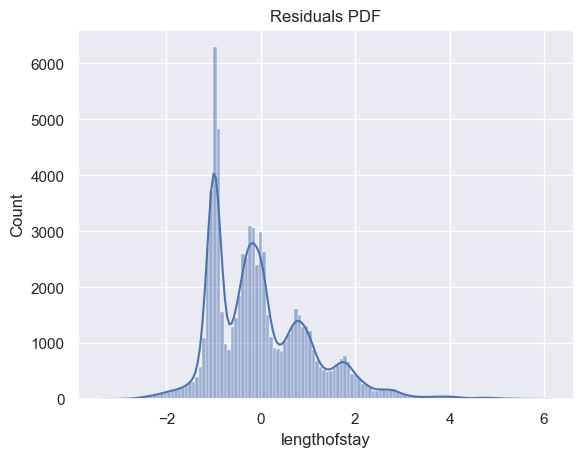

In [54]:
sns.histplot(y_train - y_pred, kde = True)
plt.title("Residuals PDF")

In [55]:
lm.score(x_train, y_train)

0.7479792257320643

In [56]:
r2 = lm.score(x_train, y_train)
n = x_train.shape[0]
p = x_train.shape[1]
adj_r2 = 1-(1-r2)* (n-1)/(n-p-1)
adj_r2

0.7479000983304104

In [57]:
# As penalty, Ridge is called to help with errors 
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alpha = 5
ridgeModel = Ridge(alpha * 0.25)
scores = cross_val_score(ridgeModel, predictors, target, cv=10)
avg_cross_val_score = np.mean(scores) * 100
print(f"Alpha: {avg_cross_val_score:.2f}%")

Alpha: 74.75%


In [58]:
lm.intercept_

1.9114120429269796

In [59]:
lm.coef_

array([ 1.11854026e+00,  7.14385263e-02,  2.77355855e+10,  2.77355855e+10,
        2.77355855e+10,  2.77355855e+10,  2.77355855e+10,  2.77355855e+10,
        2.77355855e+10,  2.77355855e+10,  2.77355855e+10,  2.77355855e+10,
        2.77355855e+10,  2.12404457e-02,  1.42754938e-01, -3.26658627e-03,
        6.59414106e-03,  1.81619068e-01, -1.90182320e-04,  7.37977066e-04,
       -3.72539445e-03,  7.00325030e-03, -4.18574160e-04, -2.77355855e+10])

In [60]:
lm_summary = pd.DataFrame(predictors.columns.values, columns = ['Features'])
lm_summary["Weights"]=lm.coef_
lm_summary

,Features,Weights
0,rcount,1.118540e+00
1,gender,7.143853e-02
2,dialysisrenalendstage,2.773559e+10
3,asthma,2.773559e+10
4,irondef,2.773559e+10
5,pneum,2.773559e+10
6,substancedependence,2.773559e+10
7,psychologicaldisordermajor,2.773559e+10
8,depress,2.773559e+10
9,psychother,2.773559e+10


# 8. Testing the model

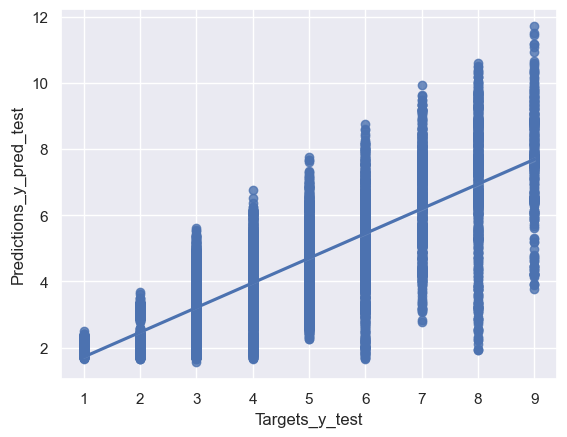

In [61]:
y_pred_test = lm.predict(x_test)
sns.regplot(x = y_test, y = y_pred_test)
plt.xlabel("Targets_y_test")
plt.ylabel("Predictions_y_pred_test")
plt.show()

#### Homoscedacity - another proof of no linearity

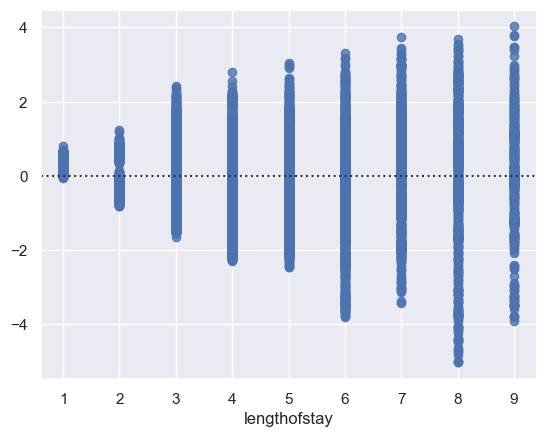

In [62]:
sns.residplot(x = y_test,y = y_pred_test)
plt.show()

In [63]:
y_test = y_test.reset_index(drop = True)
y_test.head()

0    3
1    8
2    4
3    8
4    3
Name: lengthofstay, dtype: int64

In [64]:
y_test.shape

(19117,)

In [65]:
y_pred_test = y_pred_test.round(0)
data_pred = pd.DataFrame(y_pred_test, columns=['Prediction'])
data_pred['Target'] = y_test
data_pred

,Prediction,Target
0,4.0,3
1,2.0,8
2,4.0,4
3,8.0,8
4,3.0,3
...,...,...
19112,7.0,7
19113,3.0,3
19114,2.0,3
19115,3.0,2


In [66]:
data_pred['Target'] = y_pred_test 
data_pred['Residual'] = data_pred['Prediction'] - data_pred['Target']
data_pred['% Difference'] = np.abs(data_pred['Residual']/(data_pred['Target']*100))
data_pred

,Prediction,Target,Residual,% Difference
0,4.0,4.0,0.0,0.0
1,2.0,2.0,0.0,0.0
2,4.0,4.0,0.0,0.0
3,8.0,8.0,0.0,0.0
4,3.0,3.0,0.0,0.0
...,...,...,...,...
19112,7.0,7.0,0.0,0.0
19113,3.0,3.0,0.0,0.0
19114,2.0,2.0,0.0,0.0
19115,3.0,3.0,0.0,0.0



## Predicted y_data

In [67]:
data_pred.describe()

,Prediction,Target,Residual,% Difference
count,19117.000000,19117.000000,19117.0,19117.0
mean,3.799759,3.799759,0.0,0.0
std,1.891870,1.891870,0.0,0.0
min,2.000000,2.000000,0.0,0.0
25%,2.000000,2.000000,0.0,0.0
50%,3.000000,3.000000,0.0,0.0
75%,5.000000,5.000000,0.0,0.0
max,12.000000,12.000000,0.0,0.0


In [69]:

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
mae = mean_absolute_error(y_test, y_pred_test)
print(f'The mean of absolute error, also known as l1 loss of this model (or MAE) is: {mae:.4f}')

mape = mean_absolute_percentage_error(y_test, y_pred_test)
print(f'The percentage of errors this model make is: {mape * 100:.4f} %')



The mean of absolute error, also known as l1 loss of this model (or MAE) is: 0.8115
The percentage of errors this model make is: 32.4218 %


### Conclusion: The further MAE is from 0, the more inaccurate the model is.